# Exploratory Data Analysis

By Kedei Alfred Eyong

### Introduction 

*This EDA provides a comprehensive analysis of entertainment content, exploring key trends and patterns within the given dataset. The investigation is centered around analytical entertainment insight, core insight on countries, periodic trends and key duration insights. Through in-depth analysis, dynamics of the entertainment ecosphere is explored.*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re
import datetime
from datetime import date
from collections import Counter

In [3]:
# Gathering data for analysis
df = pd.read_csv("C:/Users/LENOVO/Desktop/my_capstone_project.csv")

In [4]:
# Exploring the dataset before analysis
df.head()

,show_id,Type,title,director,Country,date added,rating,duration,listed_in
0,s1,Movie,DICK jOHNSON IS deAD,Kirsten Johnson,United States,9/25/2021,PG-13,90 min,Documentaries
1,s3,TV Show,GANGLANdS,Julien Leclercq,France,(9/24/2021),TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,MIDNIgHT MASS,Mike Flanagan,United States,(9/24/2021),TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,COnfESsIoNs OF AN INVISIBLE GIRL,Bruno Garotti,Brazil,9/22/2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,sANKOFa,Haile Gerima,Us,9/24/2021,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
# Getting a quick overview of the dataFrame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   show_id     8790 non-null   object
 1   Type        8790 non-null   object
 2   title       8790 non-null   object
 3   director    8790 non-null   object
 4   Country     8790 non-null   object
 5   date added  8790 non-null   object
 6   rating      8790 non-null   object
 7   duration    8790 non-null   object
 8   listed_in   8790 non-null   object
dtypes: object(9)
memory usage: 618.2+ KB


In [6]:
# Retrieving column names for easy data wrangling
df.columns

Index(['show_id', 'Type', 'title', 'director', 'Country', 'date added',
       'rating', 'duration', 'listed_in'],
      dtype='object')

In [7]:
# Converting all column names to lower case and replacing spaces with '_'
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'rating', 'duration', 'listed_in'],
      dtype='object')


In [8]:
# Verifying the accuracy of elements in each column and correcting errors
df["show_id"].unique()          # Viewing unique elements in "show_id" column

array(['s1', 's3', 's6', ..., 's8801', 's8784', 's8786'], dtype=object)

In [9]:
df["type"].unique()          # Viewing unique elements in "type" column

array(['Movie', 'TV Show', 'Mvie', 'TV', 'TVS', 'Mvi', 'Mv', 'Mve', 'MvE',
       'tv', 'm', 'M'], dtype=object)

In [10]:
corrections = {
    'Movie' : 'Movie',
    'TV Show': 'TV Show', 
    'Mvie': 'Movie', 
    'TV' : 'TV Show', 
    'TVS': 'TV Show', 
    'Mvi': 'Movie', 
    'Mv': 'Movie',  
    'Mve': 'Movie',  
    'MvE': 'Movie', 
    'tv': 'TV Show', 
    'm': 'Movie',
    'M' : 'Movie' 
}

In [11]:
df["type"] = df["type"].replace(corrections)    # Implementing corrections in "type" column

## Key Insights

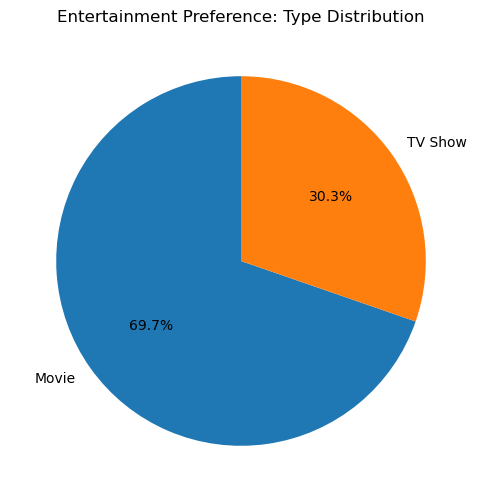

In [12]:
# Comparing the number of Movies and TV Shows using a pie chart 
type_counts = df['type'].value_counts()
plt.figure(figsize=(8, 6)) 
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Entertainment Preference: Type Distribution')
plt.show()

In [13]:
df["title"].unique()             # Viewing unique elements in "title" column

array(['DICK jOHNSON IS deAD', 'GANGLANdS', 'MIDNIgHT MASS', ...,
       'ziNdAGi gULZAR haI', 'yOKO', 'YoM'], dtype=object)

In [14]:
# Capitalizing first letters of elements in "title" column
for index, row in df.iterrows():
    df.loc[index, "title"] = " ".join([word.capitalize() for word in row["title"].split()])

print(df["title"])

0                   Dick Johnson Is Dead
1                              Ganglands
2                          Midnight Mass
3       Confessions Of An Invisible Girl
4                                Sankofa
                      ...               
8785                          Yunus Emre
8786                           Zak Storm
8787                  Zindagi Gulzar Hai
8788                                Yoko
8789                                 Yom
Name: title, Length: 8790, dtype: object


In [15]:
df["director"].unique()        # Viewing unique elements in "director" column

array(['Kirsten Johnson', 'Julien Leclercq', 'Mike Flanagan', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [16]:
# Insights on directors
# Most popular directors (top 10) and frequency of occurence in the 'director' column
directors = df["director"].tolist()
most_popular_directors = Counter(directors).most_common(10)
print(most_popular_directors)

[('Not Given', 2588), ('Rajiv Chilaka', 20), ('Raúl Campos, Jan Suter', 18), ('Alastair Fothergill', 18), ('Suhas Kadav', 16), ('Marcus Raboy', 16), ('Jay Karas', 14), ('Cathy Garcia-Molina', 13), ('Youssef Chahine', 12), ('Martin Scorsese', 12)]


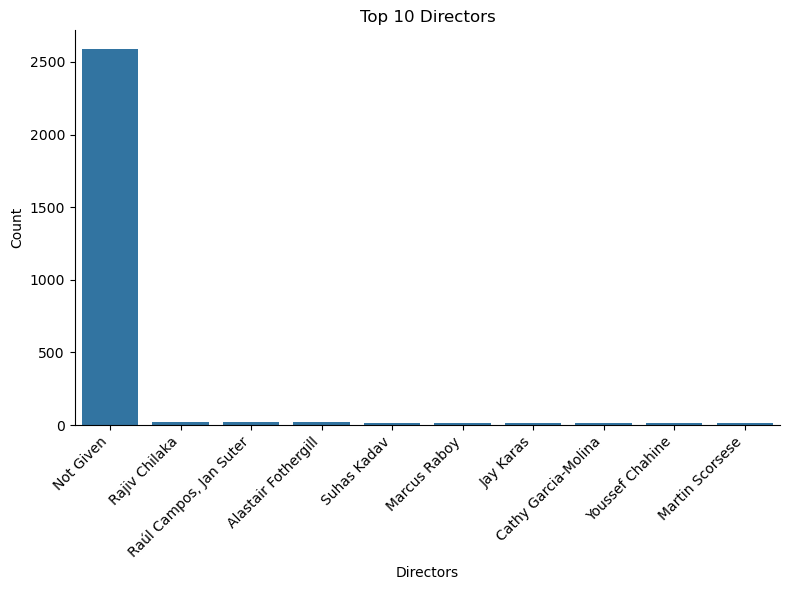

In [17]:
# Top 10 Entertainment Directors
popular_directors_df = pd.DataFrame(most_popular_directors, columns=['Director', 'Count'])
plt.figure(figsize=(8, 6))
sns.barplot(x='Director', y='Count', data=popular_directors_df)
plt.title('Top 10 Directors')
plt.xlabel('Directors')
plt.xticks(rotation=45, horizontalalignment='right')  
plt.tight_layout()
sns.despine(top=True, right=True)
plt.show() 

In [18]:
# Most preferred director and frequency of occurence in the 'director' column
most_preferred_director = Counter(directors).most_common(1)
print(most_preferred_director)

[('Not Given', 2588)]


In [19]:
# Least preferred director and frequency of occurence in the 'director' column
least_preferred_director = Counter(directors).most_common()[-1]
print(least_preferred_director)

('Mozez Singh', 1)


In [20]:
df["country"].unique()       # Viewing unique elements in "country" column

array(['United States', 'France', 'Brazil', 'Us', 'UK', 'India',
       'Germany', 'PK', 'US', 'Pakistan', 'Not Given', 'China',
       'South Africa', 'Japan', 'JP', 'Nigeria', 'Spain',
       'United Kingdom', 'Philippines', 'Australia', 'Argentina',
       'Canada', 'Hong Kong', 'Italy', 'New Zealand', 'Egypt', 'Colombia',
       'Mexico', 'Belgium', 'Switzerland', 'Argentin', 'Taiwan',
       'Bulgaria', 'Poland', 'South Korea', 'Saudi Arabia', 'Thailand',
       'Indonesia', 'Kuwait', 'Malaysia', 'australia', 'Vietnam',
       'nited States', 'Lebanon', 'Romania', 'Syria', 'united States',
       'United Arab Emirates', 'Sweden', 'Mauritius', 'Austria', 'Turkey',
       'china', 'Czech Republic', 'ID', 'Cameroon', 'Netherlands',
       'Ireland', 'Russia', 'Kenya', 'Chile', 'Uruguay', 'Bangladesh',
       'Portugal', 'Hungary', 'Norway', 'canada', 'Singapore', 'Iceland',
       'Serbia', 'Namibia', 'Peru', 'Mozambique', 'Ghana', 'thailan',
       'Zimbabwe', 'UAE', 'United states'

In [21]:
correction_1 = {
    'United States': 'USA',
    'France':'France',
    'Brazil':'Brazil',
    'Us': 'USA',
    'UK': 'UK',
    'India': 'India',
    'Germany': 'Germany',
    'PK': 'Pakistan',
    'US': 'USA',
    'Pakistan': 'Pakistan',
    'Not Given':'Not Given',
    'China': 'China',
    "South Africa": "South Africa",
    'Japan': 'Japan',
    'JP': 'Japan',
    'Nigeria': 'Nigeria',
    'Spain': 'Spain',
    'United Kingdom': 'UK',
    'Philippines': 'Philippines',
    'Australia': 'Australia',
    'Argentina': 'Argentina',
    'Canada': 'Canada',
    "Hong Kong": "Hong Kong",
    'Italy': 'Italy',
    'New Zealand': 'New Zealand',
    'Egypt': 'Egypt',
    'Colombia': 'Colombia',
    'Mexico': 'Mexico',
    'Belgium': 'Belgium',
    'Switzerland': 'Switzerland',
    'Argentin': 'Argentina',
    'Taiwan': 'Taiwan',
    'Bulgaria': 'Bulgaria',
    'Poland': 'Poland', 
    "South Korea": "South Korea", 
    "Saudi Arabia": "Saudi Arabia", 
    'Thailand': 'Thailand',
    'Indonesia': 'Indonesia', 
    'Kuwait': 'Kuwait', 
    'Malaysia': 'Malaysia', 
    'australia': 'Australia', 
    'Vietnam': 'Vietnam',
    'nited States': 'USA', 
    'Lebanon': 'Lebanon', 
    'Romania': 'Romania', 
    'Syria': 'Syria', 
    'united States': 'USA',
    'United Arab Emirates':'UAE', 
    'Sweden': 'Sweden', 
    'Mauritius': 'Mauritius', 
    'Austria': 'Austria', 
    'Turkey': 'Turkey',
    'china': 'China', 
    "Czech Republic": "Czech Republic", 
    'ID': 'Indonesia', 
    'Cameroon': 'Cameroon', 
    'Netherlands': 'Netherlands',
    'Ireland': 'Ireland', 
    'Russia': 'Russia', 
    'Kenya': 'Kenya', 
    'Chile': 'Chile', 
    'Uruguay': 'Uruguay', 
    'Bangladesh': 'Bangladesh',
    'Portugal': 'Portugal', 
    'Hungary': 'Hungary', 
    'Norway': 'Norway', 
    'canada': 'Canada', 
    'Singapore': 'Singapore', 
    'Iceland': 'Iceland',
    'Serbia': 'Serbia',
    'Namibia': 'Namibia',
    'Peru': 'Peru',
    'Mozambique': 'Mozambique',
    'Ghana': 'Ghana',
    'thailan': 'Thailand',
    'Zimbabwe': 'Zimbabwe',
    'UAE':'UAE',
    'United states': 'USA',
    'United State': 'USA',
    'Israel': 'Israel',
    'Finland': 'Finland',
    'Denmark': 'Denmark',
    "HK": "Hong Kong",
    'united states': 'USA',
    'Paraguay': 'Paraguay',
    'Cambodia': 'Cambodia',
    'ITL': 'Italy',
    'Georgia': 'Georgia',
    "Soviet Union": "Soviet Union",
    'Greece': 'Greece',
    "West Germany": "West Germany",
    'Iran': 'Iran',
    'Venezuela': 'Venezuela',
    'us': 'USA',
    'thailand': 'Thailand',
    'Slovenia': 'Slovenia',
    'uk': 'UK',
    'Guatemala': 'Guatemala',
    'Jamaica': 'Jamaica', 
    'Somalia': 'Somalia',
    'Croatia': 'Croatia',
    'Jordan': 'Jordan',
    'Luxembourg': 'Luxembourg',
    'Senegal': 'Senegal',
    'Belarus': 'Belarus',
    "Puerto Rico": "Puerto Rico",
    'Cyprus': 'Cyprus',
    'malaysia': 'Malaysia',
    'taiwan': 'Taiwan',
    'mexico': 'Mexico',
    'japan': 'Japan',
    'india': 'India',
    'pakistan': 'Pakistan',
    'Ukraine': 'Ukraine'
}

In [22]:
df["country"] = df["country"].replace(correction_1)    # Implementing correction in "country" column

In [23]:
# Distribution of entertainment by countries
country_distribution = df['country'].value_counts()
print(country_distribution)

country
USA             3240
India           1048
UK               638
Pakistan         421
Not Given        287
                ... 
Iran               1
West Germany       1
Greece             1
Zimbabwe           1
Soviet Union       1
Name: count, Length: 86, dtype: int64


Text(0.5, 1.0, 'Top 10 Countries')

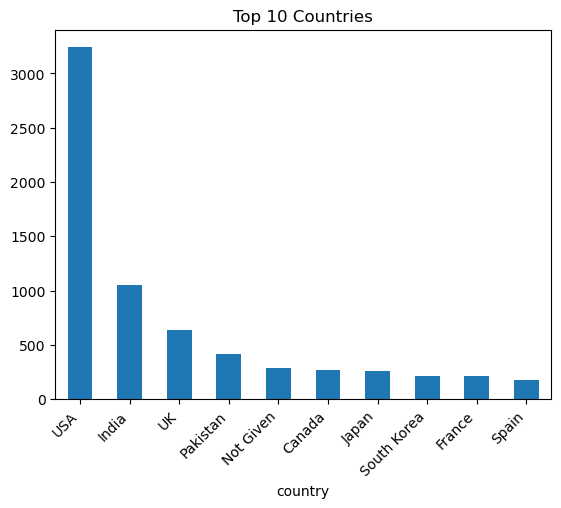

In [24]:
# Top 10 Countries
df['country'].value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Top 10 Countries')

In [25]:
# Countries with most and least entertainment (top 5 and bottom 5)
country_distribution = df['country'].value_counts()
top5_countries = country_distribution.head(5)
bottom5_countries = country_distribution.tail(5)
print(top5_countries, bottom5_countries)

country
USA          3240
India        1048
UK            638
Pakistan      421
Not Given     287
Name: count, dtype: int64 country
Iran            1
West Germany    1
Greece          1
Zimbabwe        1
Soviet Union    1
Name: count, dtype: int64


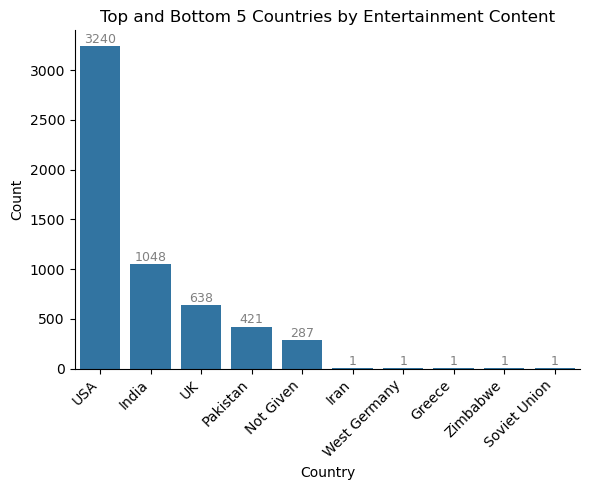

In [26]:
#Top and Bottom 5 Countries with Entertainment Content 
combined_countries = pd.concat([top5_countries, bottom5_countries])
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=combined_countries.index, y=combined_countries.values)
plt.title('Top and Bottom 5 Countries by Entertainment Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, horizontalalignment='right')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='gray', xytext=(0, 5),
                textcoords='offset points')

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

In [27]:
# Most popular entertainment in countries (top 5)
country_entertainment = df['country'] + '-' + df['type']
most_popular_entertainment = country_entertainment.value_counts().head()
print(most_popular_entertainment)

USA-Movie           2395
India-Movie          967
USA-TV Show          845
UK-Movie             387
Pakistan-TV Show     350
Name: count, dtype: int64


In [28]:
df["date_added"].unique()       # Viewing unique elements in "date_added" column

array(['9/25/2021', '(9/24/2021)', '9/22/2021', ..., '5/22/2016',
       '09/11/2019', '04/01/2014'], dtype=object)

In [29]:
# Removing '()' from elements in "date_added" column
df.date_added = df.date_added.str.strip('()')
print(df.date_added)

0        9/25/2021
1        9/24/2021
2        9/24/2021
3        9/22/2021
4        9/24/2021
           ...    
8785     1/17/2017
8786     9/13/2018
8787    12/15/2016
8788     6/23/2018
8789    06/07/2018
Name: date_added, Length: 8790, dtype: object


In [30]:
# Creating the 'year' column from 'date_added' and adding it to the dataset
df['date_added'] = pd.to_datetime(df['date_added'])    # Convert to datetime objects

df['year'] = df['date_added'].dt.year                  # Creating the 'year' column

print(df['year'].unique())                            # Viewing unique elements in the 'year' column

[2021 2019 2018 2020 2017 2016 2015 2014 2013 2012 2011 2009 2008 2010]


In [31]:
# Converting data in 'year' to an integer
df.year = df.year.astype('int')
print(df.year)

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8785    2017
8786    2018
8787    2016
8788    2018
8789    2018
Name: year, Length: 8790, dtype: int32


In [32]:
# Number of entertainment content released per year
entertainment_release_trend = df['year'].value_counts().sort_index()
print(entertainment_release_trend)

year
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64


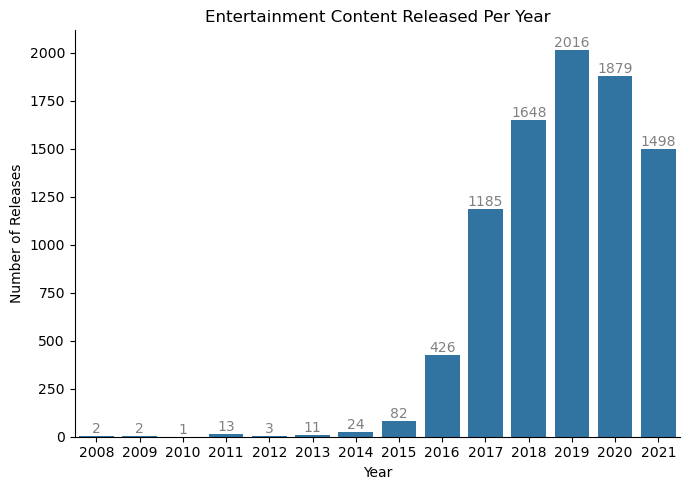

In [33]:
#Entertainment Content Released Per Year
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='year', data=df, order=entertainment_release_trend.index)
plt.title('Entertainment Content Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='gray', xytext=(0, 5),
                textcoords='offset points')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

In [34]:
# Creating the "year_month" column from "date_added" and adding it to dataset
df['year_month'] = df['date_added'].dt.strftime('%Y-%m')
print(df['year_month'].unique()) 

['2021-09' '2021-05' '2021-07' '2021-06' '2019-11' '2018-06' '2018-05'
 '2019-06' '2021-08' '2021-04' '2021-03' '2021-02' '2021-01' '2020-12'
 '2020-11' '2020-10' '2020-01' '2020-09' '2020-08' '2020-07' '2020-06'
 '2018-09' '2020-05' '2020-04' '2020-03' '2020-02' '2019-12' '2019-10'
 '2019-08' '2019-09' '2019-07' '2019-05' '2019-04' '2019-03' '2019-02'
 '2018-08' '2019-01' '2018-12' '2018-11' '2018-10' '2018-07' '2018-04'
 '2017-07' '2018-01' '2017-12' '2017-11' '2017-09' '2017-10' '2017-08'
 '2016-10' '2016-09' '2016-02' '2015-10' '2016-06' '2018-03' '2018-02'
 '2016-01' '2017-06' '2017-04' '2016-12' '2017-05' '2017-03' '2016-11'
 '2017-02' '2017-01' '2016-08' '2016-07' '2016-05' '2016-04' '2016-03'
 '2015-12' '2015-11' '2015-09' '2015-08' '2015-07' '2015-06' '2015-05'
 '2015-04' '2015-03' '2015-02' '2014-12' '2014-11' '2014-10' '2014-09'
 '2014-08' '2014-07' '2014-04' '2014-01' '2013-12' '2013-11' '2012-02'
 '2011-10' '2011-09' '2011-05' '2009-11' '2009-05' '2008-01' '2012-11'
 '2013

In [35]:
# Adding 'days_since_release' column to the dataset
df['date_added'] = pd.to_datetime(df['date_added'])
today = pd.to_datetime(date.today())
df['days_since_release'] = (today - df['date_added']).dt.days
print(df['days_since_release'])

0       1237
1       1238
2       1238
3       1240
4       1238
        ... 
8785    2949
8786    2345
8787    2982
8788    2427
8789    2443
Name: days_since_release, Length: 8790, dtype: int64


Text(0, 0.5, 'Count')

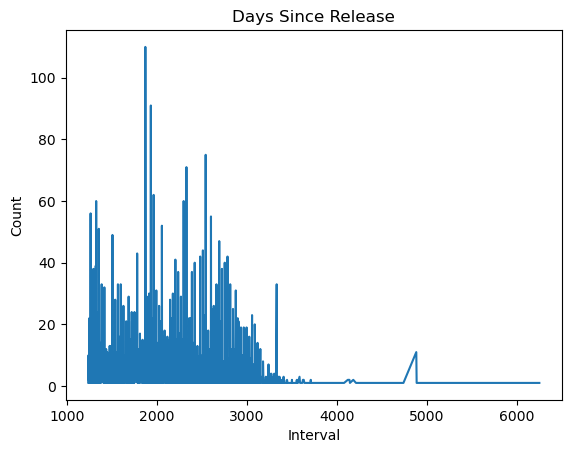

In [36]:
df['days_since_release'].value_counts().sort_index().plot()
plt.title('Days Since Release')
plt.xlabel('Interval')
plt.ylabel('Count')

In [37]:
df["rating"].unique()     # Viewing unique elements in "rating" column

array(['PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'R', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'r', 'UR', 'pg', 'nr',
       'tv-ma', 'tv-14', 'tv14', 'TV-Pg', 'tv-y', 'tv-pg'], dtype=object)

In [38]:
correction_2 = {
    'PG-13': 'PG-13',
    'TV-MA': 'TV-MA',
    'TV-PG': 'TV-PG',
    'TV-14': 'TV-14',
    'TV-Y7': 'TV-Y7',
    'TV-Y': 'TV-Y',
    'PG': 'PG',
    'TV-G': 'TV-G',
    'R': 'R',
    'G': 'G',
    'NC-17': 'NC-17',
    'NR': "Not Rated",
    "TV-Y7-FV": "TV-Y7-FV",
    'r': 'R',
    'UR': "Not Rated", 
    'pg':'PG',
    "nr": "Not Rated",
    'tv-ma': 'TV-MA',
    'tv-14': 'TV-14', 
    'tv14': 'TV-14',
    'TV-Pg': 'TV-PG',
    'tv-y': 'TV-Y',
    'tv-pg': 'TV-PG'
}

In [39]:
df["rating"] = df["rating"].replace(correction_2)    # Implementing correction_2 in "rating" column
print(df["rating"])

0       PG-13
1       TV-MA
2       TV-MA
3       TV-PG
4       TV-MA
        ...  
8785    TV-PG
8786    TV-Y7
8787    TV-PG
8788     TV-Y
8789    TV-Y7
Name: rating, Length: 8790, dtype: object


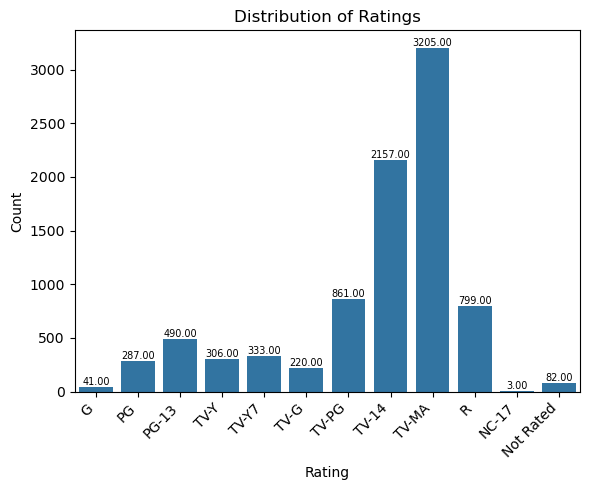

In [40]:
# Analyzing distribution of entertainment ratings
entertainment_rating = ['G', 'PG', 'PG-13', 'TV-Y', 'TV-Y7', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA', 'R', 'NC-17', 'Not Rated']
df['rating'] = pd.Categorical(df['rating'], categories=entertainment_rating, ordered=True)
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='rating', data=df)
for bar in ax.patches:
   plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, horizontalalignment='right')  
plt.tight_layout()
plt.show()

In [41]:
df["duration"].unique()     # Viewing unique elements in "duration" column

array(['90 min', '1 Season', '91 min', '125 min', '9 Seasons', '104 min',
       '87 min', '127 min', '76 min', '71 min', '131 min', '39 min',
       '36 min', '34 min', '35 min', '46 min', '67 min', '65 min',
       '61 min', '166 min', '103 min', '97 min', '106 min', '2 Seasons',
       '4 Seasons', '147 min', '94 min', '161 min', '111 min', '110 min',
       '105 min', '96 min', '124 min', '116 min', '98 min', '115 min',
       '122 min', '55 min', '99 min', '88 min', '100 min', '6 Seasons',
       '3 Seasons', '23 min', '102 min', '93 min', '95 min', '85 min',
       '83 min', '182 min', '5 Seasons', '92 min', '84 min', '48 min',
       '145 min', '119 min', '80 min', '128 min', '143 min', '273 min',
       '117 min', '114 min', '118 min', '108 min', '37 min', '121 min',
       '63 min', '142 min', '113 min', '154 min', '120 min', '82 min',
       '109 min', '101 min', '86 min', '77 min', '229 min', '15 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '44 min',
  

In [42]:
correction_3 = {
    '90 min':'90 min',
    '1 Season':'1 Season',
    '91 min':'91 min',
    '125 min':'125 min',
    '9 Seasons':'9 Seasons', 
    '104 min':'104 min',
    '87 min':'87 min',
    '127 min':'127 min',
    '76 min':'76 min', 
    '71 min':'71 min',
    '131 min':'131 min', 
    '39 min':'39 min',
    '36 min':'36 min',
    '34 min':'34 min',
    '35 min':'35 min', 
    '46 min':'46 min', 
    '67 min':'67 min', 
    '65 min':'65 min',
    '61 min':'61 min', 
    '166 min':'166 min', 
    '103 min':'103 min', 
    '97 min':'97 min', 
    '106 min':'106 min', 
    '2 Seasons':'2 Seasons',
    '4 Seasons':'4 Seasons', 
    '147 min':'147 min', 
    '94 min':'94 min',
    '161 min':'161 min',
    '111 min':'111 min', 
    '110 min':'110 min',
    '105 min':'105 min',
    '96 min':'96 min', 
    '124 min':'124 min', 
    '116 min':'116 min', 
    '98 min':'98 min', 
    '115 min':'115 min',
    '122 min':'122 min', 
    '55 min':'55 min', 
    '99 min':'99 min', 
    '88 min':'88 min', 
    '100 min':'100 min', 
    '6 Seasons':'6 Seasons',
    '3 Seasons':'3 Seasons', 
    '23 min':'23 min', 
    '102 min':'102 min', 
    '93 min':'93 min', 
    '95 min':'95 min', 
    '85 min':'85 min',
    '83 min':'83 min',
    '182 min':'182 min', 
    '5 Seasons':'5 Seasons', 
    '92 min':'92 min',
    '84 min':'84 min', 
    '48 min':'48 min',
    '145 min':'145 min',
    '119 min':'119 min', 
    '80 min':'80 min', 
    '128 min':'128 min', 
    '143 min': '143 min', 
    '273 min':'273 min',
    '117 min':'117 min',
    '114 min':'114 min',
    '118 min':'118 min', 
    '108 min':'108 min',
    '37 min':'37 min', 
    '121 min':'121 min',
    '63 min':'63 min', 
    '142 min':'142 min', 
    '113 min':'113 min', 
    '154 min':'154 min', 
    '120 min':'120 min', 
    '82 min':'82 min',
    '109 min':'109 min', 
    '101 min':'101 min', 
    '86 min':'86 min', 
    '77 min':'77 min',
    '229 min':'229 min', 
    '15 min':'15 min',
    '89 min':'89 min', 
    '156 min':'156 min', 
    '112 min':'112 min', 
    '107 min':'107 min', 
    '129 min':'129 min', 
    '44 min':'44 min',
    '68 min':'68 min', 
    '135 min':'135 min',
    '136 min':'136 min',
    '165 min':'165 min',
    '150 min':'150 min', 
    '133 min':'133 min',
    '47 min':'47 min',
    '70 min':'70 min',
    '56 min':'56 min', 
    '58 min':'58 min',
    '78 min':'78 min', 
    '140 min':'140 min',
    '64 min':'64 min', 
    '59 min':'59 min', 
    '60 min':'60 min', 
    '69 min':'69 min', 
    '19 min':'19 min',
    '22 min':'22 min', 
    '148 min':'148 min', 
    '189 min':'189 min', 
    '54 min':'54 min', 
    '141 min':'141 min', 
    '130 min':'130 min',
    '81 min':'81 min', 
    '7 Seasons':'7 Seasons', 
    '138 min':'138 min', 
    '132 min':'132 min', 
    '8 Seasons':'8 Seasons',
    '123 min':'123 min', 
    '66 min':'66 min', 
    '62 min':'62 min', 
    '74 min':'74 min',  
    '38 min':'38 min', 
    '13 min':'13 min',
    '139 min':'139 min', 
    '126 min':'126 min', 
    '155 min':'155 min', 
    '159 min':'159 min', 
    '12 min':'12 min', 
    '137 min':'137 min',
    '49 min':'49 min',
    '72 min':'72 min', 
    '204 min':'204 min', 
    '25 min':'25 min', 
    '212 min':'212 min',
    '73 min':'73 min',
    '149 min':'149 min', 
    '224 min':'224 min', 
    '162 min':'162 min',
    '75 min':'75 min', 
    '79 min':'79 min', 
    '32 min':'32 min',
    '158 min':'158 min', 
    '164 min':'164 min', 
    '173 min':'173 min', 
    '181 min':'181 min', 
    '185 min':'185 min', 
    '21 min':'21 min',
    '24 min':'24 min', 
    '51 min':'51 min', 
    '151 min':'151 min',
    '42 min':'42 min', 
    '134 min':'134 min',
    '177 min':'177 min',
    '52 min':'52 min', 
    '53 min':'53 min', 
    '8 min':'8 min', 
    '57 min':'57 min',
    '28 min':'28 min', 
    '50 min':'50 min', 
    '9 min':'9 min',
    '26 min':'26 min', 
    '45 min':'45 min', 
    '171 min':'171 min', 
    '27 min':'27 min', 
    '33 min':'33 min', 
    '29 min':'29 min',
    '146 min':'146 min', 
    '20 min':'20 min',  
    '157 min':'157 min',
    '203 min':'203 min', 
    '41 min':'41 min',
    '30 min':'30 min', 
    '17 min':'17 min', 
    '194 min':'194 min',  
    '15 Seasons':'15 Seasons',
    '233 min':'233 min', 
    '230 min':'230 min', 
    '237 min':'237 min', 
    '195 min':'195 min', 
    '253 min':'253 min', 
    '152 min':'152 min',
    '190 min':'190 min', 
    '160 min':'160 min', 
    '208 min':'208 min', 
    '180 min':'180 min', 
    '144 min':'144 min', 
    '5 min':'5 min',
    '174 min':'174 min', 
    '170 min':'170 min', 
    '192 min':'192 min', 
    '209 min':'209 min', 
    '187 min':'187 min', 
    '172 min':'172 min',
    '16 min':'16 min', 
    '186 min':'186 min', 
    '11 min':'11 min', 
    '193 min':'193 min', 
    '176 min':'176 min', 
    '169 min':'169 min', 
    '40 min':'40 min', 
    '3 min':'3 min', 
    '168 min':'168 min', 
    '153 min':'153 min', 
    '214 min':'214 min',
    '31 min':'31 min', 
    '163 min':'163 min', 
    '66 mins':'66 mins', 
    '97 mins':'97 min', 
    '14 min':'14 min', 
    '179 min':'179 min',
    '43 min':'43 min', 
    '200 min':'200 min',
    '196 min':'196 min', 
    '167 min':'167 min', 
    '178 min':'178 min', 
    '228 min':'228 min', 
    '18 min':'18 min', 
    '205 min':'205 min',
    '201 min':'201 min', 
    '191 min':'191 min', 
    '17 Seasons':'17 Seasons', 
    '13 Seasons':'13 Seasons',
    '10 Seasons':'10 Seasons',  
    '10 min':'10 min', 
    '312 min':'312 min', 
    '12 Seasons':'12 Seasons', 
    '11 Seasons':'11 Seasons',
    '80':'80 min', 
    '63':'63 min',
    '85 mins':'85 min',
    '80 mins':'80 min',
    '103':'103 min',
    '82':'82 min',
    '94':'94 min',
    '101':'101 min',
    '110':'110 min',
    '112':'112 min',
    '90':'90 min',
    '86':'86 min',
    '7':'7 Seasons',
    '99':'99 min',
    '72':'72 min',
    '111':'111 min',
    '53':'53 min',
    '92':'92 min',
    '158 mins':'158 min',
    '140':'140 min',
    '94 mins':'94 min',
    '129':'129 min',
    '10':'10 Seasons',
    '7':'7 Seasons',
    '24':'24 Seasons',
    '1':'1 Season', 
    '3':'3 min',
    '95':'95 min'
    }

In [43]:
df["duration"] = df["duration"].replace(correction_3)    # Implementing correction_3 in "duration" column
print(df["duration"])

0          90 min
1        1 Season
2        1 Season
3          91 min
4         125 min
          ...    
8785    2 Seasons
8786    3 Seasons
8787     1 Season
8788     1 Season
8789     1 Season
Name: duration, Length: 8790, dtype: object


In [44]:
# Grouping countries based on entertainment duration in minutes
df_minutes = df[df['duration'].str.contains('min')]
country_entertainment_minutes = df_minutes.groupby('country')['duration'].count()
country_entertainment_minutes = country_entertainment_minutes.sort_values(ascending=False)
print(country_entertainment_minutes)

country
USA          2396
India         967
UK            387
Not Given     257
Canada        186
             ... 
Guatemala       1
Greece          1
Croatia         1
Cameroon        1
Zimbabwe        1
Name: duration, Length: 79, dtype: int64


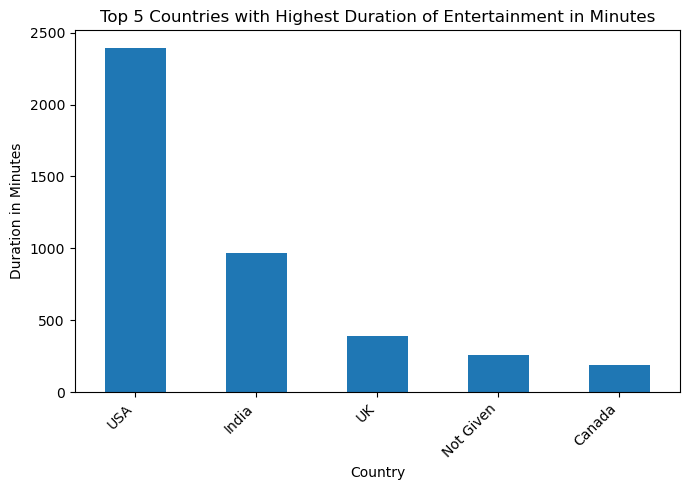

In [45]:
# Top 5 Countries with Highest Duration in Minutes
country_entertainment_minutes.head(5).plot.bar(figsize=(7, 5))
plt.title('Top 5 Countries with Highest Duration of Entertainment in Minutes')
plt.xlabel('Country')
plt.ylabel('Duration in Minutes')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

In [46]:
# Creating a column called 'duration_in_minutes'
def convert_to_minutes(duration):
    if isinstance(duration, str):
        match = re.search(r'(\d+) min', duration)
        if match:
            return int(match.group(1))
    return None

df['duration_in_minutes'] = df['duration'].apply(convert_to_minutes)

In [47]:
# Distribution of Countries by Average Entertainment Duration in Minutes
grouped_min = df.groupby('country')['duration_in_minutes'].mean()
grouped_min = grouped_min.sort_values(ascending=False)
print(grouped_min)

country
Croatia         157.000000
West Germany    150.000000
Soviet Union    147.000000
Cameroon        143.000000
India           125.057911
                   ...    
Jordan                 NaN
Luxembourg             NaN
Puerto Rico            NaN
Senegal                NaN
Ukraine                NaN
Name: duration_in_minutes, Length: 86, dtype: float64


In [48]:
# Countries with Highest Average Entertainment Duration in Minutes
top_average_duration_country1 = grouped_min.head(5)
print(top_average_duration_country1)

country
Croatia         157.000000
West Germany    150.000000
Soviet Union    147.000000
Cameroon        143.000000
India           125.057911
Name: duration_in_minutes, dtype: float64


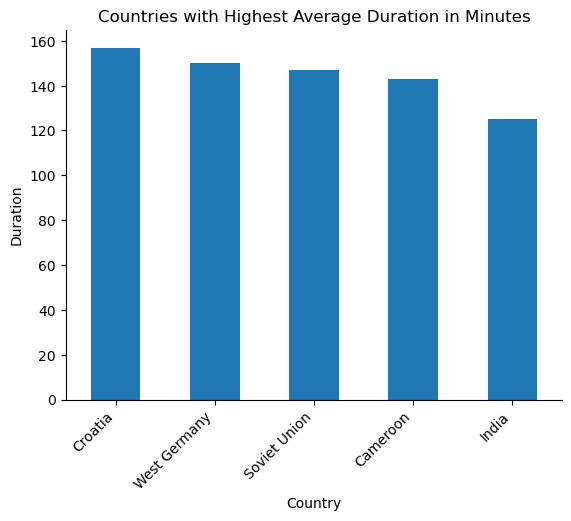

<Figure size 500x400 with 0 Axes>

In [49]:
# Countries with Highest Average Entertainment Duration in Minutes
top_average_duration_country1.plot(kind='bar')
plt.title('Countries with Highest Average Duration in Minutes')
plt.xticks(rotation=45, horizontalalignment='right')
sns.despine(top=True, right=True)
plt.xlabel('Country')
plt.ylabel('Duration')
plt.figure(figsize=(5, 4))
plt.show()

In [50]:
# Grouping countries based on entertainment duration in seasons
df_seasons = df[df['duration'].str.contains('Season')]
country_entertainment_seasons = df_seasons.groupby('country')['duration'].count()
country_entertainment_seasons = country_entertainment_seasons.sort_values(ascending=False)
print(country_entertainment_seasons)

country
USA               844
Pakistan          350
UK                251
Japan             172
South Korea       165
Canada             85
India              81
Taiwan             71
France             65
Australia          53
Spain              53
Mexico             48
China              41
Not Given          30
Turkey             30
Brazil             28
Germany            25
Colombia           25
Thailand           24
Argentina          20
Italy              19
Singapore          18
Egypt              14
Russia             14
Denmark            11
Israel             10
Belgium             9
Nigeria             9
Norway              9
Sweden              8
Poland              8
South Africa        7
Malaysia            7
Lebanon             6
Ireland             6
Saudi Arabia        5
Netherlands         5
Chile               4
Philippines         3
Iceland             3
Finland             3
Hong Kong           3
Indonesia           2
Kuwait              2
Jordan              2
Uk

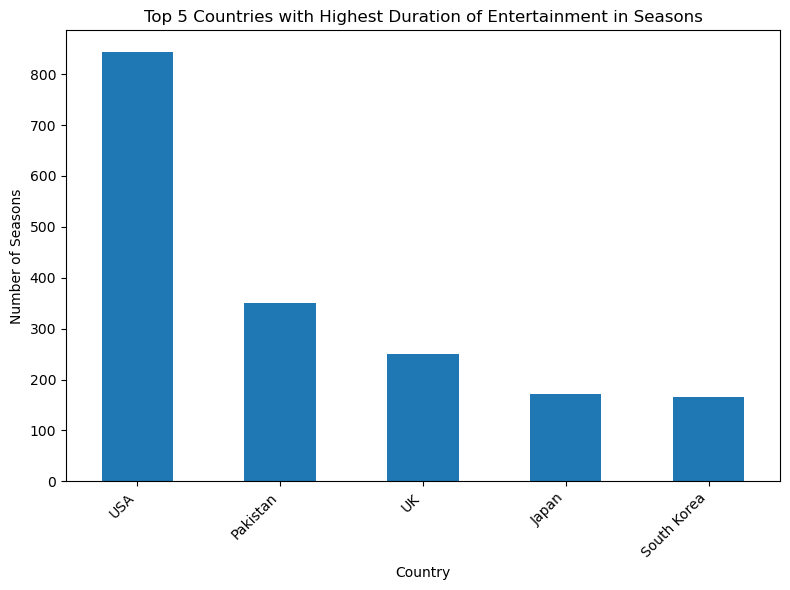

In [51]:
# Top 5 Countries with Highest Duration in Seasons
country_entertainment_seasons.head(5).plot.bar(figsize=(8, 6))
plt.title('Top 5 Countries with Highest Duration of Entertainment in Seasons')
plt.xlabel('Country')
plt.ylabel('Number of Seasons')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

In [52]:
# Creating a column called 'duration_in_seasons'
def convert_to_seasons(duration):
    if isinstance(duration, str):
        match = re.search(r'(\d+) Season', duration)
        if match:
            return int(match.group(1))
    return None

df['duration_in_seasons'] = df['duration'].apply(convert_to_seasons)

In [53]:
# Distribution of Countries by Average Entertainment Duration in Seasons
grouped_seasons = df.groupby('country')['duration_in_seasons'].mean()
grouped_seasons = grouped_seasons.sort_values(ascending=False)
print(grouped_seasons)

country
UAE             3.000000
Canada          2.858824
Ireland         2.833333
Denmark         2.727273
USA             2.295024
                  ...   
Syria                NaN
Venezuela            NaN
Vietnam              NaN
West Germany         NaN
Zimbabwe             NaN
Name: duration_in_seasons, Length: 86, dtype: float64


In [54]:
# Countries with Highest Average Entertainment Duration in Seasons
top_average_duration_country2 = grouped_seasons.head(5)
print(top_average_duration_country2)

country
UAE        3.000000
Canada     2.858824
Ireland    2.833333
Denmark    2.727273
USA        2.295024
Name: duration_in_seasons, dtype: float64


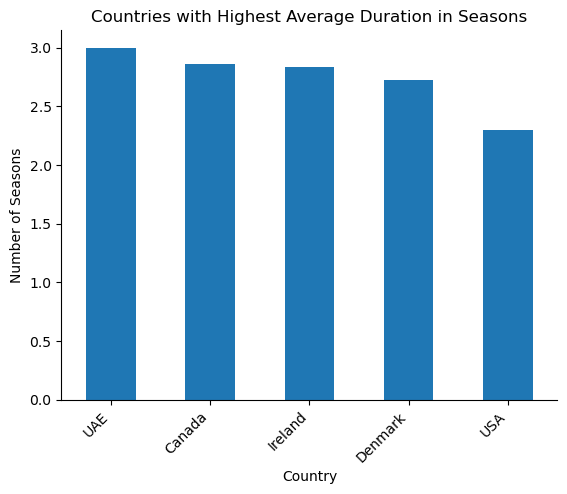

<Figure size 600x400 with 0 Axes>

In [55]:
# Countries with Highest Average Entertainment Duration in Seasons
top_average_duration_country2.plot(kind='bar')
plt.title('Countries with Highest Average Duration in Seasons')
plt.xticks(rotation=45, horizontalalignment='right')
sns.despine(top=True, right=True)
plt.xlabel('Country')
plt.ylabel('Number of Seasons')
plt.figure(figsize=(6, 4))
plt.show()

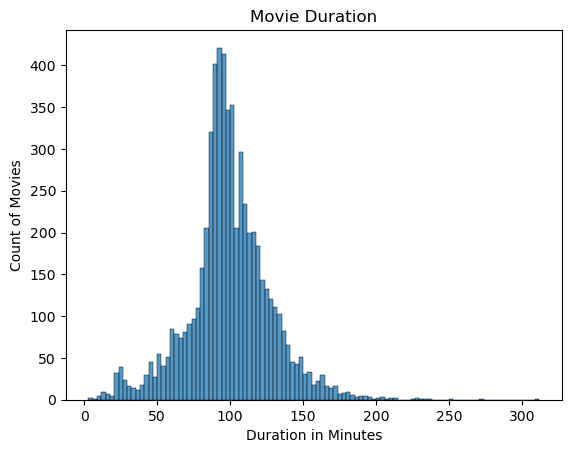

In [56]:
# Analysis of movies and duration in minutes
sns.histplot(df[df['type'] == 'Movie']['duration_in_minutes'].dropna())    
plt.title('Movie Duration')
plt.xlabel('Duration in Minutes')
plt.ylabel('Count of Movies')
plt.show()

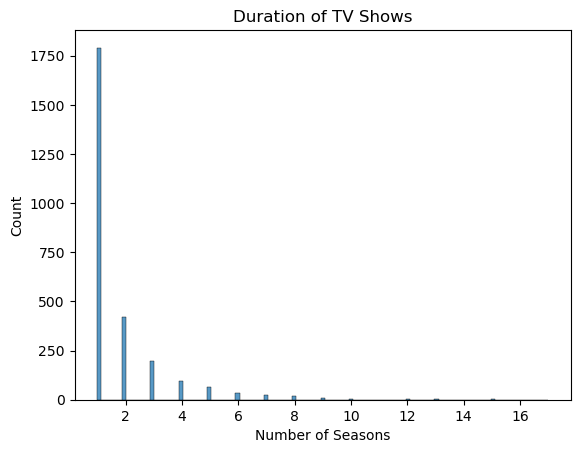

In [57]:
# Analysis of TV Shows and duration of seasons
sns.histplot(df[df['type'] == 'TV Show']['duration_in_seasons'].dropna())
plt.title('Duration of TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

In [58]:
df["listed_in"].unique()    # Viewing unique elements in "listed_in" column

array(['Documentaries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'TV Dramas, TV Horror, TV Mysteries',
       'Children & Family Movies, Comedies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Children & Family Movies, Comedies, Music & Musicals',
       'Dramas, International Movies',
       'Children & Family Movies, Music & Musicals',
       'Dramas, International Movies, Music & Musicals', 'Movies',
       'Comedies', 'Docuseries, Reality TV',
       'British TV Shows, Crime TV Shows, Docuseries',
       'Children & Family Movies', "Kids' TV",
       'Documentaries, International Movies',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Comedies, International Movies, Romantic Movies',
       'Horror Movies, Sci-Fi & Fantasy', 'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'TV Comedies', 'I

In [59]:
# Popular entertainment categories (top 5)
popular_entertainment_categories = df['listed_in'].value_counts().head()
print(popular_entertainment_categories)

listed_in
Dramas, International Movies                        362
Documentaries                                       358
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: count, dtype: int64


Text(0, 0.5, 'Count')

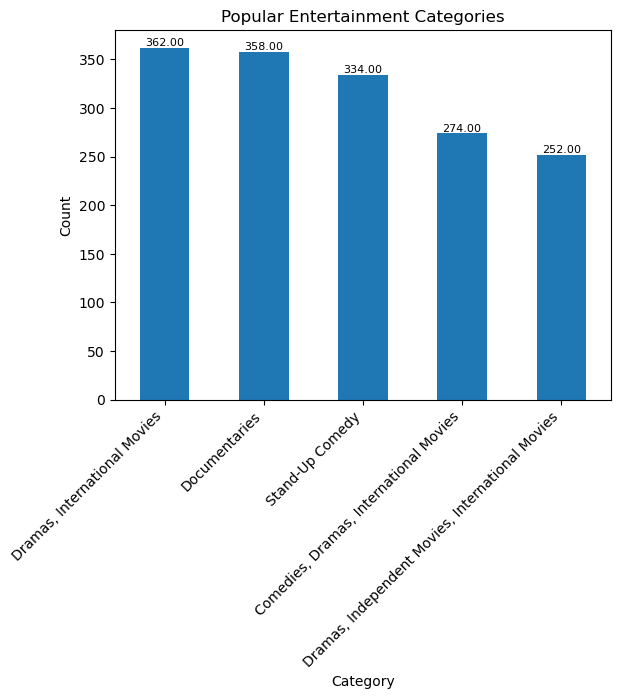

In [60]:
# Popular Entertainment Categories
ax = popular_entertainment_categories.plot(kind='bar')
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=8)
plt.title('Popular Entertainment Categories')
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Category')
plt.ylabel('Count')
#sns.despine(top=True, right=True)

## Additional Questions

In [61]:
# Bonus Questions
df2 = pd.read_csv("C:/Users/LENOVO/Desktop/my_capstone_project.csv")     # Importing data for bonus questions

In [62]:
df2.columns = df2.columns.str.lower().str.replace(' ', '_')              # Data cleaning
print(df2.columns)

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'rating', 'duration', 'listed_in'],
      dtype='object')


In [63]:
df2["type"] = df2["type"].replace(corrections)    # Implementing corrections in "type" column
df2["country"] = df2["country"].replace(correction_1)    # Implementing correction in "country" column
df2["rating"] = df2["rating"].replace(correction_2)    # Implementing correction_2 in "rating" column
df2["duration"] = df2["duration"].replace(correction_3)    # Implementing correction_3 in "duration" column
df2.date_added = df2.date_added.str.strip('()')        # Removing '()' from the "date_added" column

In [64]:
# Capitalizing first letters of elements in "title" column
for index, row in df2.iterrows():
    df2.loc[index, "title"] = " ".join([word.capitalize() for word in row["title"].split()])

print(df2["title"])

0                   Dick Johnson Is Dead
1                              Ganglands
2                          Midnight Mass
3       Confessions Of An Invisible Girl
4                                Sankofa
                      ...               
8785                          Yunus Emre
8786                           Zak Storm
8787                  Zindagi Gulzar Hai
8788                                Yoko
8789                                 Yom
Name: title, Length: 8790, dtype: object


In [65]:
# Writing a function that creates random ratings for each movie in type column
def random_ratings_with_titles(df2):
    ratings_with_titles = {}  # A dictionary for titles and ratings

    for index, row in df2.iterrows():
        movie_type = row['type'] == 'Movie'
        if movie_type:
            title = row['title']  
            rating = random.randint(1, 5)
            ratings_with_titles[title] = rating  

    return ratings_with_titles

ratings_assigned = random_ratings_with_titles(df2)
for title, rating in ratings_assigned.items():
    print(f"{title}: {rating}")

Dick Johnson Is Dead: 1
Confessions Of An Invisible Girl: 2
Sankofa: 3
The Starling: 5
Motu Patlu In The Game Of Zones: 4
Je Suis Karl: 3
Motu Patlu In Wonderland: 5
Motu Patlu: Deep Sea Adventure: 2
Motu Patlu: Mission Moon: 5
99 Songs (tamil): 4
Bridgerton - The Afterparty: 5
Bling Empire - The Afterparty: 4
Cobra Kai - The Afterparty: 4
The Circle - The Afterparty: 3
True: Winter Wishes: 5
My Little Pony: A New Generation: 2
Europe's Most Dangerous Man: Otto Skorzeny In Spain: 2
Samudri Lootere: 3
Go! Go! Cory Carson: Chrissy Takes The Wheel: 4
Jeans: 4
Grown Ups: 5
Dark Skies: 5
Paranoia: 5
Minsara Kanavu: 1
Intrusion: 2
Avvai Shanmughi: 2
Ankahi Kahaniya: 3
The Father Who Moves Mountains: 1
The Stronghold: 5
Birth Of The Dragon: 3
You Vs. Wild: Out Cold: 4
Jaws: 3
Jaws 2: 2
Jaws 3: 5
Jaws: The Revenge: 5
Safe House: 1
Training Day: 1
Dolly Parton: A Musicares Tribute: 2
Inuyasha The Movie 2: The Castle Beyond The Looking Glass: 4
Inuyasha The Movie 3: Swords Of An Honorable Ruler:

In [66]:
# Analyzing popular genres
genres = df2['listed_in'].str.cat(sep=',').split(',')
genre_count = Counter(genres)
most_popular_genres= genre_count.most_common()
print("Most popular genres:\n",most_popular_genres)

Most popular genres:
 [(' International Movies', 2624), ('Dramas', 1599), ('Comedies', 1210), ('Action & Adventure', 859), ('Documentaries', 828), (' Dramas', 827), ('International TV Shows', 772), (' Independent Movies', 736), (' TV Dramas', 694), (' Romantic Movies', 613), ('Children & Family Movies', 605), (' International TV Shows', 576), (' Thrillers', 512), (' Comedies', 464), (' TV Comedies', 454), ('Crime TV Shows', 399), ("Kids' TV", 385), (' Music & Musicals', 357), (' Romantic TV Shows', 338), ('Stand-Up Comedy', 334), ('Horror Movies', 275), ('British TV Shows', 252), (' Sci-Fi & Fantasy', 230), ('Docuseries', 220), (' Sports Movies', 218), (' Docuseries', 174), ('Anime Series', 174), (' Spanish-Language TV Shows', 171), (' Korean TV Shows', 151), (' Reality TV', 135), (' TV Action & Adventure', 128), ('International Movies', 128), ('Reality TV', 120), ('TV Comedies', 119), (' LGBTQ Movies', 101), (' TV Mysteries', 98), (' Science & Nature TV', 92), (' Horror Movies', 82), 

In [67]:
most_popular_genre = genre_count.most_common(1)
print(most_popular_genre)

[(' International Movies', 2624)]


In [68]:
# Top 5 Most Popular Genres
top_5_most_popular_genre = genre_count.most_common(5)
print(top_5_most_popular_genre)

[(' International Movies', 2624), ('Dramas', 1599), ('Comedies', 1210), ('Action & Adventure', 859), ('Documentaries', 828)]


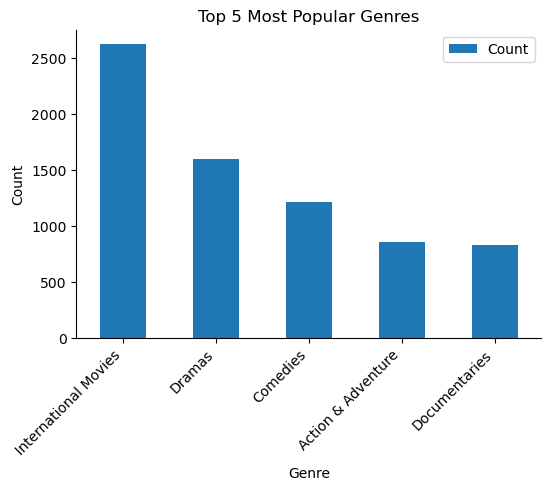

In [69]:
# Top 5 Most Popular Genres
df_top_5_genres = pd.DataFrame(top_5_most_popular_genre, columns=['Genre', 'Count'])     # creating a dataframe for easier visualization
df_top_5_genres.plot(x='Genre', y='Count', kind='bar', figsize=(6, 4))
plt.title('Top 5 Most Popular Genres')
plt.xticks(rotation=45, horizontalalignment='right')
sns.despine(top=True, right=True)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [70]:
# Writing a function that extracts duration values for TV Shows and moves them to a new column 'tv_show_duration'
def move_tv_show_duration(df2):
    
    df2['tv_show_duration'] = None  
    tv_shows = df2['type'] == 'TV Show'
    df2.loc[tv_shows, 'tv_show_duration'] = df2.loc[tv_shows, 'duration']
    df2.loc[tv_shows, 'duration'] = None

In [71]:
df2_modified = df2.copy()  
move_tv_show_duration(df2_modified)  
print(df2_modified)  

     show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions Of An Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               Yom        Not Given   

       country  date_added rating duration  \
0          USA   9/25/2021  PG-13   90 mi

## Conclusion

*Analysis of the entertainment dataset reveals preference for movies, with a significant portion of content designed for mature audiences. The USA leads in content production, followed by India and UK. Content releases surged from 2016, peaking in 2019 before slightly declining in 2020 and 2021. Viewership concentrates on newer releases, and most movies and TV shows follow typical duration patterns (90-100 minutes and 1-3 seasons respectively). However, missing data ("Not Given") across multiple categories is a crucial concern.*

## Recommendations

1. To boost TV show viewership, I recommend optimizing content strategies based on genre preferences.
2. Leverage popular genres and content durations to enhance user engagement.
3. Explore collaborations and expansion into top performing international markets (India, UK, Pakistan, Canada, Japan, South Korea, France, and Spain) for competitive advantage.
4. Standardize data collection to address data quality concerns through entry guidelines, validation and periodic audits.